In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

emi_data = pd.read_csv("/Users/ahmadelhatto/Downloads/IEA-methane-emissions-data.csv", )

# Drop the notes section as it addes no value to the data
emi_data = emi_data.drop(['notes'], axis = 1)

# Main focus is the type(Energy, Agriculture, etc) of Emission and not the segment, so we will only keep the total for each type
emi_data = emi_data[(emi_data['segment'].str.contains('Total'))]

# Check for NULLS, which in this case are fine since they are under the "World" region (No Specific Country)
emi_data.isna().sum()


region       0
country      4
emissions    0
source       0
type         0
segment      0
reason       0
baseYear     0
dtype: int64

# Regional Emissions (Not Including World)

                                     sum
region                                  
Africa                      42093.496758
Asia Pacific               152875.854718
Central and South America   37551.659139
Europe                      26481.927676
Middle East                 21469.599255
North America               42212.870908
Russia & Caspian            36110.065841


<Axes: xlabel='region', ylabel='sum'>

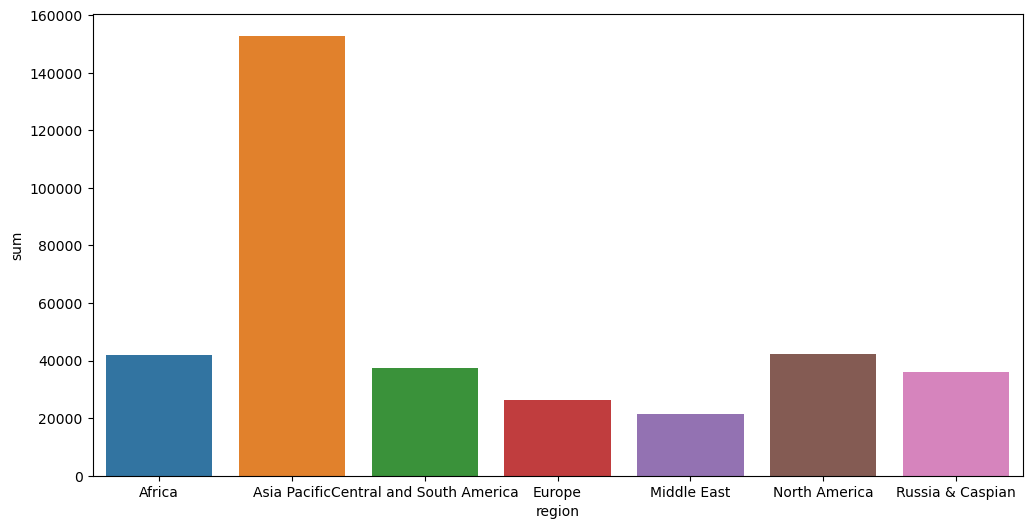

In [93]:
# Filter that selects the rows that show the world emissions
world_filter = emi_data['region'].str.contains('World')

# Filter out the "World" rows, group the indices by region, and sum the emissions for each region
regional_emi = emi_data[~world_filter].groupby('region').emissions.agg([sum])

regional_emi = regional_emi.reset_index().set_index('region')

# Check the amount for each region
print(regional_emi)

# Plot the regions with their corresponding emissions
plt.figure(figsize=(12,6))
sns.barplot(x = regional_emi.index, y = regional_emi['sum'])

<Axes: xlabel='region', ylabel='sum'>

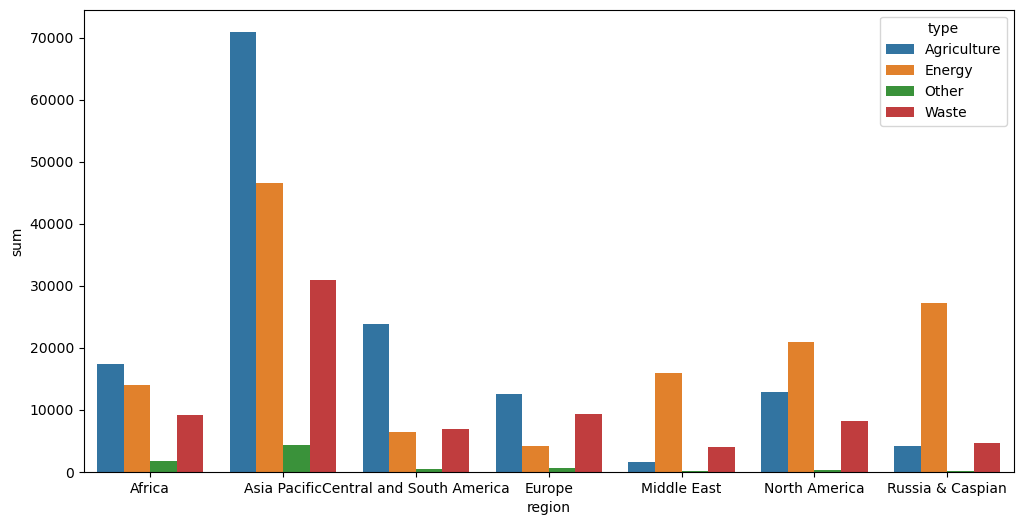

In [115]:
# Regional emission types
reg_type_emi = emi_data[~world_filter].groupby(['region', 'type']).emissions.agg([sum])

reg_type_emi = reg_type_emi.reset_index().set_index('region')
1
# Plot the regions and types with their corresponding emissions
plt.figure(figsize=(12,6))
sns.barplot(x = reg_type_emi.index, y = reg_type_emi['sum'], hue = reg_type_emi['type'])

# World Emissions

type
Agriculture    141380.171900
Energy         135231.718800
Other            7277.776367
Waste           72999.453130
Name: emissions, dtype: float64


<Axes: xlabel='type', ylabel='emissions'>

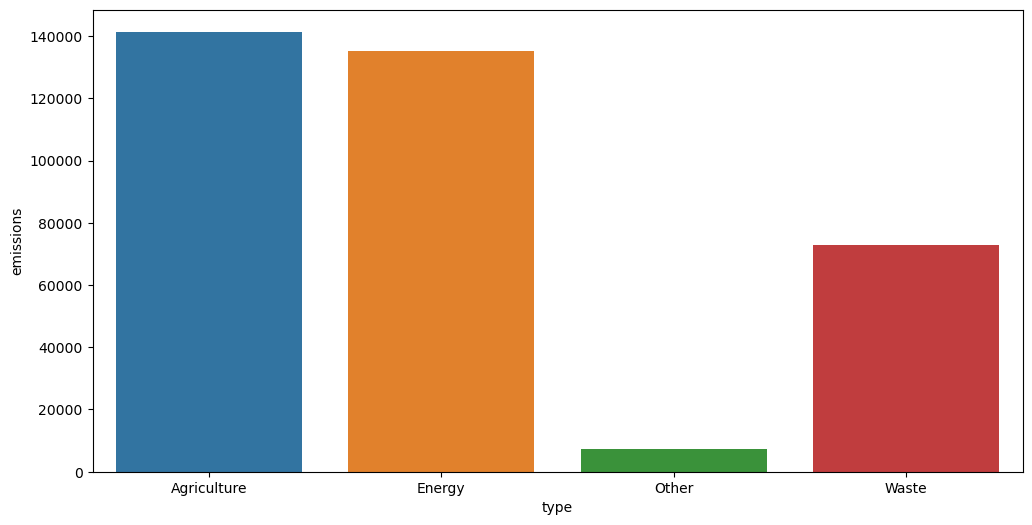

In [116]:
world_emi = emi_data[world_filter].groupby('type').emissions.sum()

print(world_emi)

plt.figure(figsize=(12,6))
sns.barplot(x = world_emi.index, y = world_emi)